# Here's a step-by-step guide to creating a financial market data analysis database in Anaconda's Jupyter Notebook using Python:

Step 1: Install necessary libraries

Open Anaconda's Jupyter Notebook and create a new notebook.
Install the following libraries by running the following commands

pip install pandas
pip install yfinance
pip install mplfinance
pip install scipy
pip install statsmodels

 Step 2: Import necessary libraries

In your Jupyter Notebook, import the necessary libraries:

In [5]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.0 MB/s eta 0:00:00


Check if installation is successful:
After installing mplfinance, you can check if it's installed correctly by running:

In [6]:
import mplfinance as mpf
print(mpf.__version__)

0.12.10b0


In [7]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
from scipy.stats import norm
import statsmodels.api as sm

# Step 3: Download historical financial market data

Use the yfinance library to download historical financial market data for a specific stock or index. For example:

In [9]:
data = yf.download('AAPL', start='2020-01-01', end='2022-02-26')

[*********************100%%**********************]  1 of 1 completed


This code downloads the historical stock price data for Apple (AAPL) from January 1, 2020 to February 26, 2022.

Step 4: Clean and preprocess the data

Convert the downloaded data into a Pandas DataFrame:

In [10]:
df = pd.DataFrame(data)

Clean and preprocess the data by handling missing values, converting dates to datetime format, and setting the index to the date column:

In [14]:
import pandas as pd
df = pd.DataFrame(data)
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [15]:
df = df.dropna()  # drop missing values
df['Date'] = pd.to_datetime(df.index)  # convert index to datetime format
df.set_index('Date', inplace=True)  # set index to date column

Step 5: Analyze and visualize the data

Use various statistical and visualization techniques to analyze and visualize the financial market data. For example:

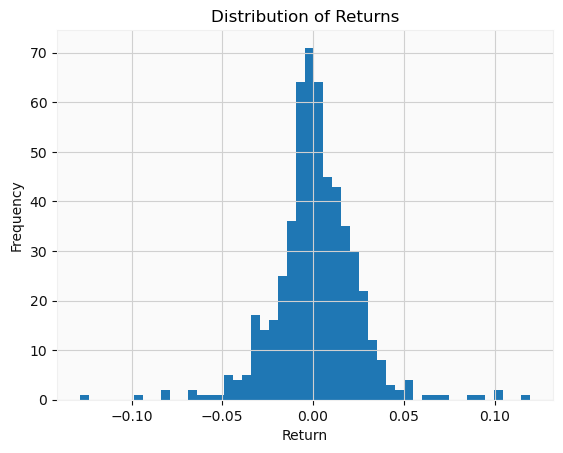

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming df is your DataFrame and 'Returns' is your column name

# Fit a Gaussian distribution to the returns
df['Returns'].replace([np.inf, -np.inf], np.nan, inplace=True)
dist = norm.fit(df['Returns'].dropna())

# Plot the distribution of returns
plt.hist(df['Returns'].dropna(), bins=50)
plt.title('Distribution of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

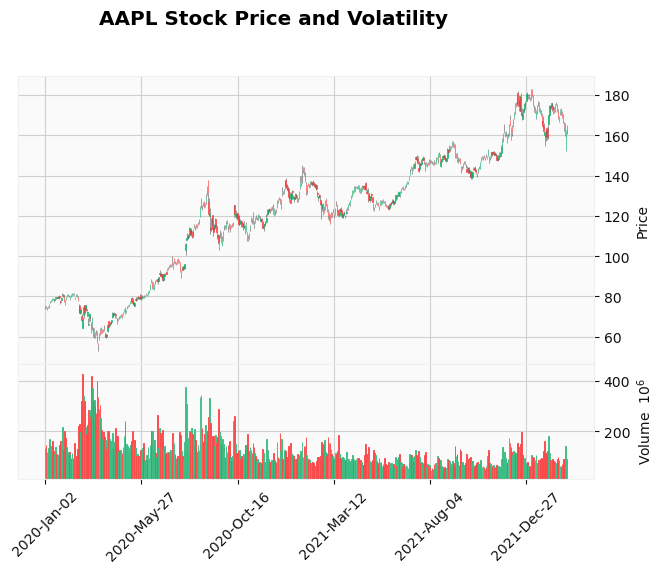

             Open        High         Low       Close   Adj Close  \
count  543.000000  543.000000  543.000000  543.000000  543.000000   
mean   121.664733  123.150530  120.224304  121.751400  119.347997   
std     31.402491   31.579597   31.140715   31.360898   31.177448   
min     57.020000   57.125000   53.152500   56.092499   54.569736   
25%     95.087498   96.307499   93.983749   95.615002   93.271095   
50%    125.570000  126.989998  124.129997  125.570000  123.108040   
75%    144.919998  146.709999  144.055000  145.639999  143.114532   
max    182.630005  182.940002  179.119995  182.009995  179.273605   

             Volume     Returns  Volatility  
count  5.430000e+02  542.000000  523.000000  
mean   1.221307e+08    0.001723    0.020946  
std    6.166728e+07    0.023319    0.011145  
min    4.100000e+07   -0.128647    0.008909  
25%    8.108665e+07   -0.009157    0.013913  
50%    1.058613e+08    0.000868    0.018411  
75%    1.443249e+08    0.013978    0.024141  
max    4.2

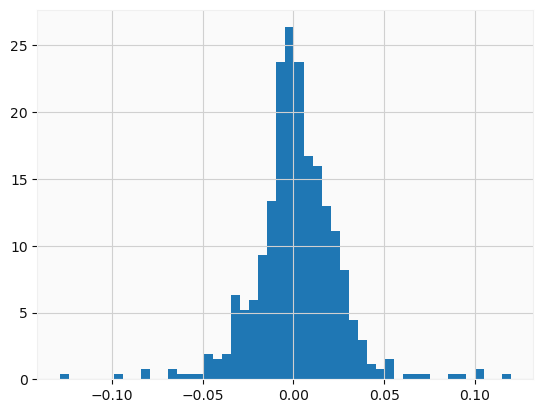

In [23]:
# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Calculate daily volatility
df['Volatility'] = df['Returns'].rolling(window=20).std()

# Plot the stock price and volatility
mpf.plot(df, type='candle', style='yahoo', volume=True, title='AAPL Stock Price and Volatility')

# Calculate statistical metrics (e.g. mean, std, skewness)
print(df.describe())

# Plot the distribution of returns
import matplotlib.pyplot as plt
plt.hist(df['Returns'], bins=50, density=True)
plt.show()